# Perkenalan

**Milestone 1**

by. Haikal Ramadhan Usman

Tujuan dari Analisis ini adalah melakukan pemodelan machine learning untuk memprediksi apakah customer dari Bank akan berlangganan produk dari marketing Bank tersebut atau tidak

Model yang akan digunakan pada analisis ini adalah:
1. Decision Tree
2. Random Forest
3. Gaussian Naive Bayes
4. SVC
5. Logistic Regression
6. K-nearest Neighbors
7. Percepton

Dataset yang akan digunakan dapat diunduh di https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Import Library yang akan digunakan

1. matplotlib: digunakan untuk memvisualisasikan data
2. pandas: untuk loading, manipulasi dan preprocessing dataset
3. numpy: untuk perhitungan numerik
4. seaborn: untuk memvisualisasikan data
5. sklearn: Machine learning framework yang digunakan
  *   LogisticRegression = model Machine Learning yang akan diimplementasikan
  *   SVM = model Machine Learning yang akan diimplementasikan
  *   StandardScaler = Untuk scaling data
  *   LabelEncoder = Encode label into numeric value
  *   GaussianNB = Model Machine learning yang akan digunakan
  *   Perceptron = Model Machine learning yang akan digunakan
  *   KNeighborsClassifier = Model yang akan digunakan
  *   DecisionTreeClassifier = Model yang akan digunakan
  *   RandomForestClassifier = Model yang akan digunakan
  *   KFold = melakukan cross validation
  *   GridSearchCV = Grid Search CV
  *   accuracy_score = Menghidung akurasi
  *   variance_inflation_factor = mencari multicollinearity


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Loading

In [4]:
df = pd.read_csv("/content/bank-additional-full.csv", sep=";")

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# EDA

In [10]:
dfnew = df.copy()

In [11]:
dfnew = dfnew.rename(columns={'default':'defaultCredit','housing':'loanHousing','loan':'personalLoan','month':'lastMonth',
                      'day_of_week':'lastDay','duration':'lastDuration','campaign':'numOfContact','pdays':'passedDay',
                      'previous':'prevNumOfContact','poutcome':'prevOutcome','y':'subscribed'})

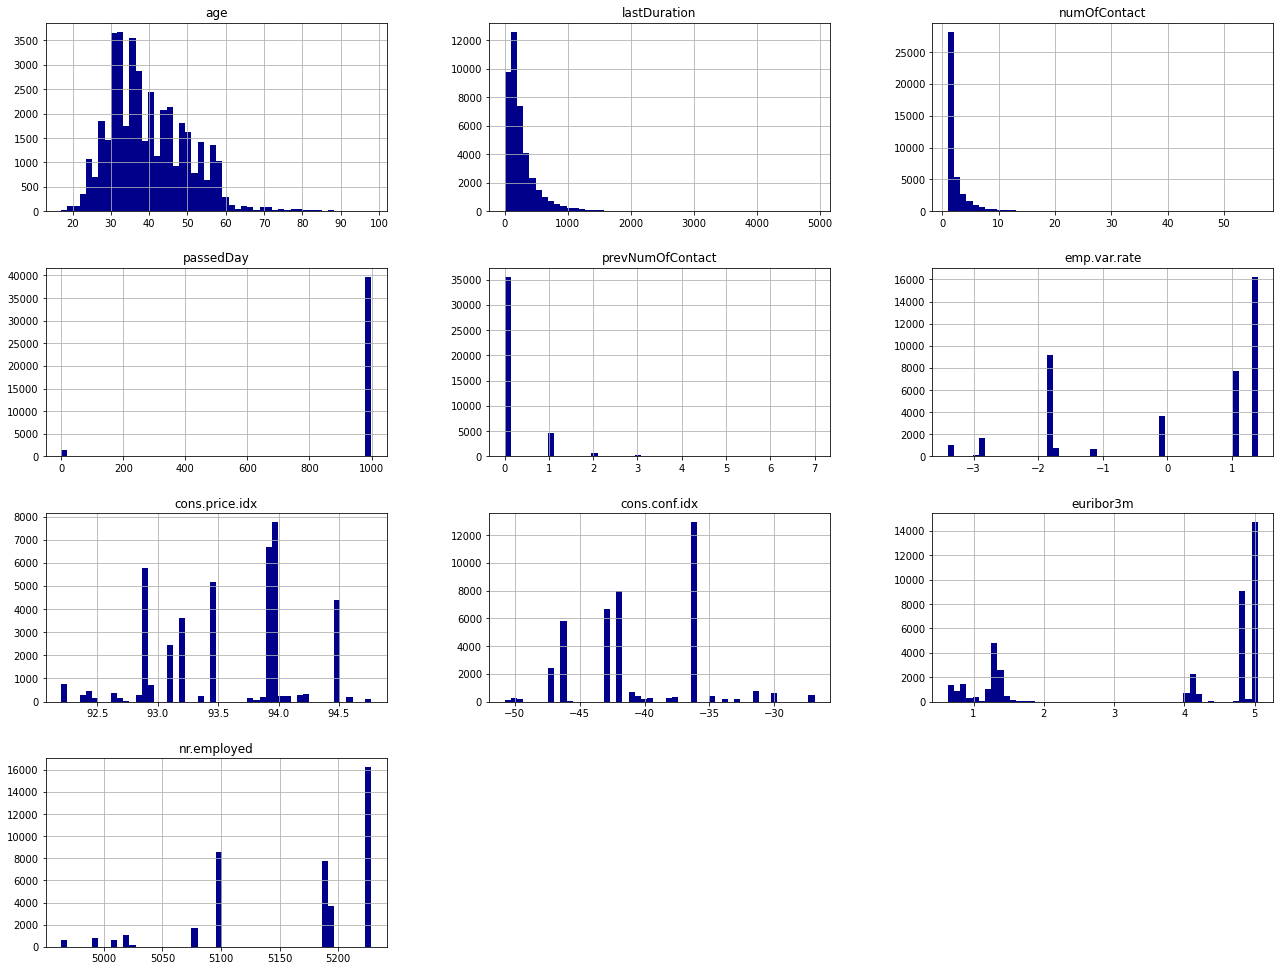

In [12]:
dfnew.hist(bins=50, figsize=(22, 17), color = "DarkBlue")
plt.show()

1. nr.employed, euribor3m, cons.conf.idx merupakan data yang diskrit
2. age, lastDuration, dan numOfCOntact distribusi nya skewed kanan

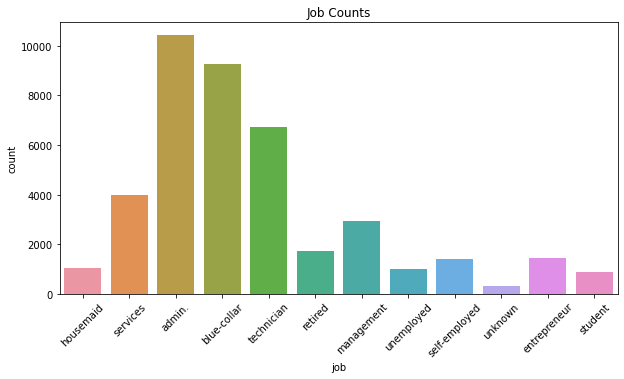

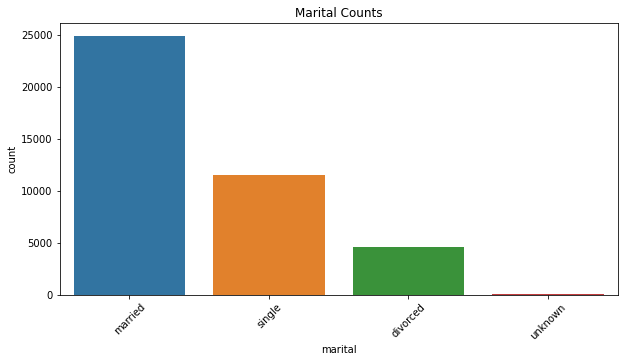

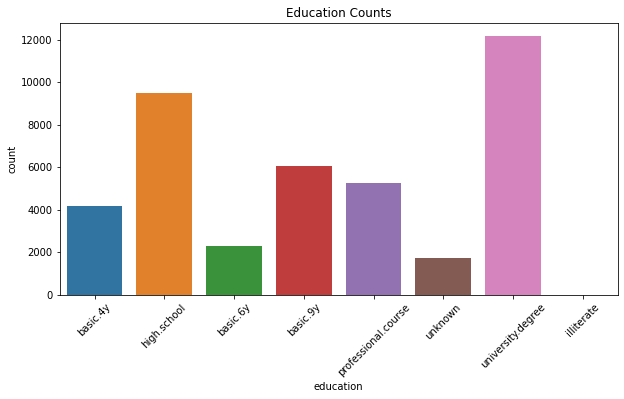

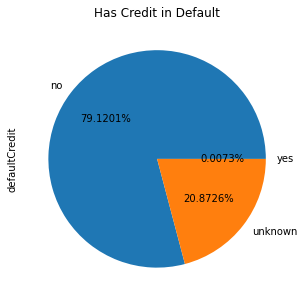

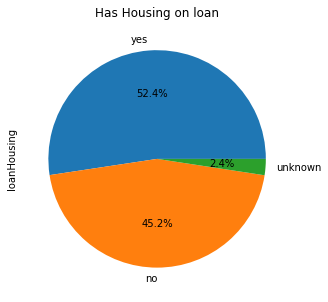

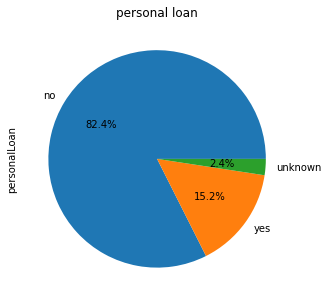

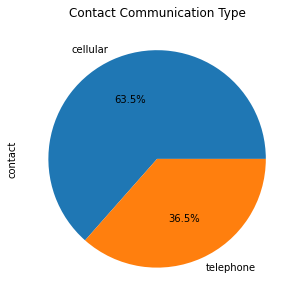

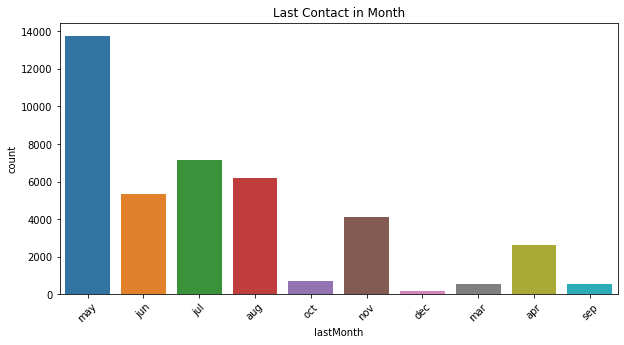

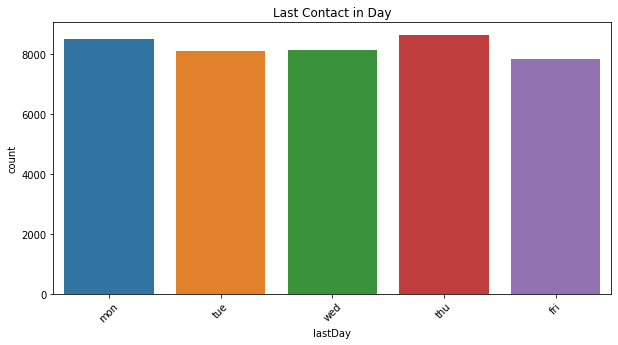

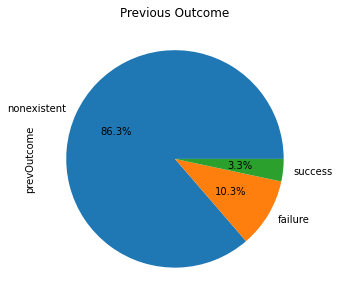

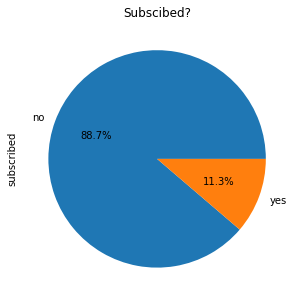

In [13]:
plt.figure(figsize=(10,5))
plt.title('Job Counts')
p = sns.countplot(x="job", data=dfnew)
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Marital Counts')
p = sns.countplot(x="marital", data=dfnew)
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Education Counts')
p = sns.countplot(x="education", data=dfnew)
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()

dfnew.defaultCredit.value_counts().plot(kind='pie', title="Has Credit in Default", autopct='%.4f%%', figsize=(5,5))
plt.show()

dfnew.loanHousing.value_counts().plot(kind='pie', title="Has Housing on loan", autopct='%.1f%%', figsize=(5,5))
plt.show()

dfnew.personalLoan.value_counts().plot(kind='pie', title="personal loan", autopct='%.1f%%', figsize=(5,5))
plt.show()

dfnew.contact.value_counts().plot(kind='pie', title="Contact Communication Type", autopct='%.1f%%', figsize=(5,5))
plt.show()

plt.figure(figsize=(10,5))
plt.title('Last Contact in Month')
p = sns.countplot(x="lastMonth", data=dfnew)
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Last Contact in Day')
p = sns.countplot(x="lastDay", data=dfnew)
p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.show()

dfnew.prevOutcome.value_counts().plot(kind='pie', title="Previous Outcome", autopct='%.1f%%', figsize=(5,5))
plt.show()

dfnew['subscribed'].value_counts().plot(kind='pie', title="Subscibed?", autopct='%.1f%%', figsize=(5,5))
plt.show()

1. Profesi terbanyak adalah orang yang bekerja sebagai admin.
2. Dari data, kebanyakan yang didata adalah orang yang sudah menikah.
3. Orang-orang yang didata kebanyakan lulusan Universitas
4. Hanya 0.0073% orang yang punya credit
5. 82% tidak mempunyai personal loan
6. 63.5% costumer dihubungi melalui cellular
7. Hanya 11.3% orang yang berlangganan

# Data Cleaning

In [14]:
cols = ['job', 'marital', 'education', 'defaultCredit', 'loanHousing', 'personalLoan',
       'contact', 'lastMonth', 'lastDay', 'prevOutcome', 'subscribed']
for col in cols:
    print(dfnew[col].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


Terdapat beberapa data yang tidak diketahui(unknown)

In [15]:
dfnew.job.value_counts().unknown

330

In [16]:
dfnew.marital.value_counts().unknown

80

In [18]:
dfnew.education.value_counts().unknown

1731

In [17]:
dfnew.defaultCredit.value_counts().unknown

8597

In [19]:
dfnew.loanHousing.value_counts().unknown

990

In [20]:
dfnew.personalLoan.value_counts().unknown

990

Untuk job, saya akan replace unknown menjadi unemployed

In [21]:
dfnew['job'] = dfnew['job'].replace('unknown','unemployed')

Marital dan education akan saya ganti dengan nilai modus

In [22]:
dfnew['marital'].mode()

0    married
dtype: object

In [23]:
dfnew['marital'] = dfnew['marital'].replace('unknown','married')

In [24]:
dfnew['education'].mode()

0    university.degree
dtype: object

In [25]:
dfnew['education'] = dfnew['education'].replace('unknown','university.degree')

Untuk data yang binary, akan saya ganti unknown dengan no

In [26]:
dfnew['defaultCredit'] = dfnew['defaultCredit'].replace('unknown','no')

In [27]:
dfnew['loanHousing'] = dfnew['loanHousing'].replace('unknown','no')

In [28]:
dfnew['personalLoan'] = dfnew['personalLoan'].replace('unknown','no')

passedDay memiliki nilai 999 yang artinya client belum pernah dihubungi sebelumnya. Akan saya ubah jadi nan, lalu cari median dan fillna dengan nilai median.

In [29]:
dfnew['passedDay'] = dfnew.passedDay.replace({999:np.nan})

In [30]:
dfnew['passedDay'].median()

6.0

In [31]:
dfnew['passedDay'].unique()

array([nan,  6.,  4.,  3.,  5.,  1.,  0., 10.,  7.,  8.,  9., 11.,  2.,
       12., 13., 14., 15., 16., 21., 17., 18., 22., 25., 26., 19., 27.,
       20.])

In [32]:
dfnew['passedDay'].fillna(dfnew['passedDay'].median(), inplace=True)

In [33]:
dfnew['passedDay'] = dfnew['passedDay'].astype('int')

In [34]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   job               41188 non-null  object 
 2   marital           41188 non-null  object 
 3   education         41188 non-null  object 
 4   defaultCredit     41188 non-null  object 
 5   loanHousing       41188 non-null  object 
 6   personalLoan      41188 non-null  object 
 7   contact           41188 non-null  object 
 8   lastMonth         41188 non-null  object 
 9   lastDay           41188 non-null  object 
 10  lastDuration      41188 non-null  int64  
 11  numOfContact      41188 non-null  int64  
 12  passedDay         41188 non-null  int64  
 13  prevNumOfContact  41188 non-null  int64  
 14  prevOutcome       41188 non-null  object 
 15  emp.var.rate      41188 non-null  float64
 16  cons.price.idx    41188 non-null  float6

In [35]:
dfnew.head(15)

,age,job,marital,education,defaultCredit,loanHousing,personalLoan,contact,lastMonth,lastDay,lastDuration,numOfContact,passedDay,prevNumOfContact,prevOutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
for col in cols:
    print(dfnew[col].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
['married' 'single' 'divorced']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


Data Categoric akan saya ubah jadi numeric menggunakan LabelEncoder()

In [37]:
cols = ['job','marital','education','defaultCredit','loanHousing','personalLoan',
        'contact','lastMonth','lastDay','prevOutcome','subscribed']
lbl = LabelEncoder()
for col in cols:
    dfnew[col] = lbl.fit_transform(dfnew[col])

In [38]:
dfnew[cols].head()

,job,marital,education,defaultCredit,loanHousing,personalLoan,contact,lastMonth,lastDay,prevOutcome,subscribed
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,0,0,0,1,6,1,1,0
2,7,1,3,0,1,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,1,1,6,1,1,0


In [39]:
dfnew.describe()

,age,job,marital,education,defaultCredit,loanHousing,personalLoan,contact,lastMonth,lastDay,lastDuration,numOfContact,passedDay,prevNumOfContact,prevOutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.716568,1.168884,3.705157,0.000073,0.523842,0.151695,0.365252,4.230868,2.004613,258.285010,2.567593,6.000534,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.579417,0.603589,2.081202,0.008534,0.499437,0.358729,0.481507,2.320025,1.397575,259.279249,2.770014,0.733342,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,102.000000,1.000000,6.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,180.000000,2.000000,6.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,319.000000,3.000000,6.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,27.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


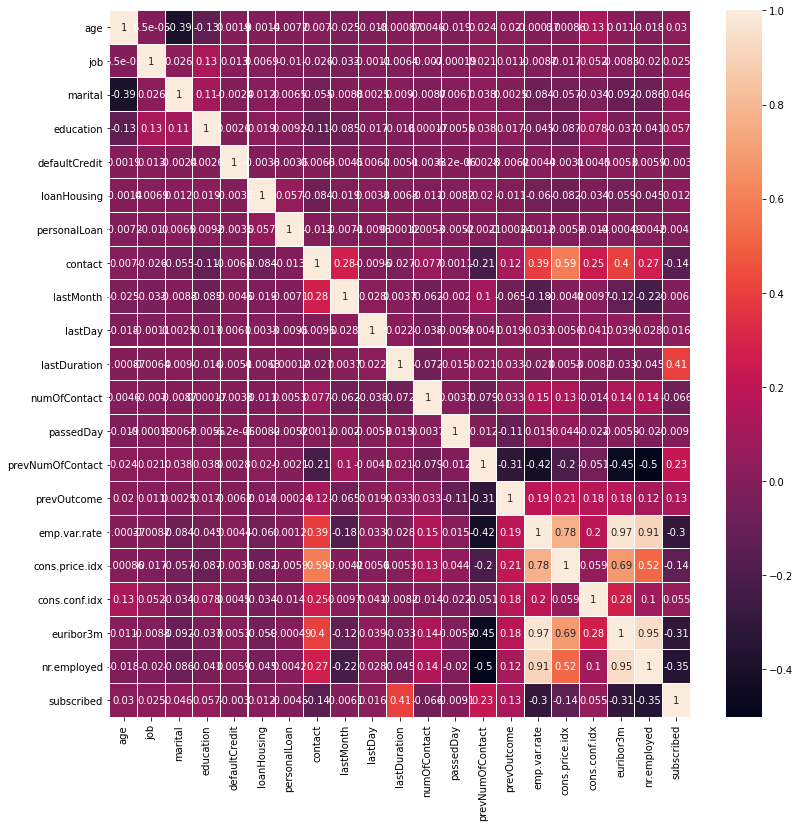

In [40]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(dfnew.corr(), annot=True, linewidths=.05, ax=ax)
plt.show()

lastDuration memiliki korelasi dengan subcribed, juka durasi 0, maka subscribe no

# Data Preprocessing

Mencari multicollinearity

In [41]:
features=dfnew.drop(columns='subscribed')
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
vif_data

,feature,VIF
0,age,19.411246
1,job,2.124424
2,marital,5.719821
3,education,4.473677
4,defaultCredit,1.000559
5,loanHousing,2.125115
6,personalLoan,1.183471
7,contact,2.839175
8,lastMonth,6.776280
9,lastDay,3.085020


In [42]:
dfnew = dfnew.drop(['emp.var.rate','nr.employed','prevNumOfContact','lastMonth','lastDay','numOfContact',
                    'cons.price.idx','age','passedDay'], axis=1)

In [43]:
dfnew.loc[(dfnew['defaultCredit']==1)&(dfnew['subscribed']==1)]

,job,marital,education,defaultCredit,loanHousing,personalLoan,contact,lastDuration,prevOutcome,cons.conf.idx,euribor3m,subscribed


In [44]:
dfnew = dfnew.drop(['defaultCredit'], axis=1)

In [45]:
dfnew

,job,marital,education,loanHousing,personalLoan,contact,lastDuration,prevOutcome,cons.conf.idx,euribor3m,subscribed
0,3,1,0,0,0,1,261,1,-36.4,4.857,0
1,7,1,3,0,0,1,149,1,-36.4,4.857,0
2,7,1,3,1,0,1,226,1,-36.4,4.857,0
3,0,1,1,0,0,1,151,1,-36.4,4.857,0
4,7,1,3,0,1,1,307,1,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,1,0,0,334,1,-50.8,1.028,1
41184,1,1,5,0,0,0,383,1,-50.8,1.028,0
41185,5,1,6,1,0,0,189,1,-50.8,1.028,0
41186,9,1,5,0,0,0,442,1,-50.8,1.028,1


## Resampling

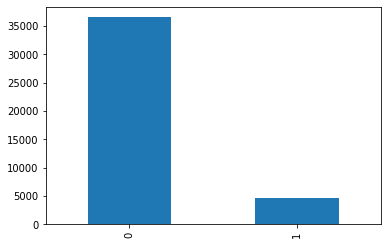

In [46]:
dfnew['subscribed'].value_counts().plot(kind="bar")

Menyamaratakan nilai 0 seperti nilai 1

In [47]:
# Under Sampling
No = dfnew[dfnew['subscribed']==0]
Yes = dfnew[dfnew['subscribed']==1]
dfnew = pd.concat([No.sample(len(Yes), random_state = 42), Yes], axis=0).reset_index(drop=True)

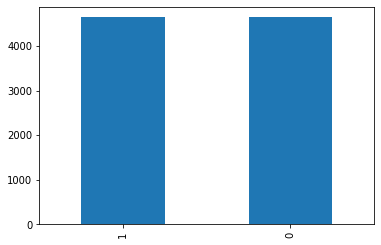

In [48]:
dfnew['subscribed'].value_counts().plot(kind="bar")

In [49]:
X = StandardScaler().fit_transform(dfnew.drop(['subscribed'], axis=1))
y = dfnew['subscribed']

# Model Definition, Training and Evaluation

## KFOLD

In [50]:
kFold=KFold(n_splits=5)

In [51]:
cvInd=[[],[]]
for trainInd, testInd in kFold.split(X):
    cvInd[0].append(trainInd)
    cvInd[1].append(testInd)

In [52]:
cvInd[0]

[array([1856, 1857, 1858, ..., 9277, 9278, 9279]),
 array([   0,    1,    2, ..., 9277, 9278, 9279]),
 array([   0,    1,    2, ..., 9277, 9278, 9279]),
 array([   0,    1,    2, ..., 9277, 9278, 9279]),
 array([   0,    1,    2, ..., 7421, 7422, 7423])]

In [53]:
cvInd[1]

[array([   0,    1,    2, ..., 1853, 1854, 1855]),
 array([1856, 1857, 1858, ..., 3709, 3710, 3711]),
 array([3712, 3713, 3714, ..., 5565, 5566, 5567]),
 array([5568, 5569, 5570, ..., 7421, 7422, 7423]),
 array([7424, 7425, 7426, ..., 9277, 9278, 9279])]

In [54]:
accDT=[]
modelDT = DecisionTreeClassifier() # ganti variable dan model
for i in range(5):
    print("range: ",i)
    tr_id=cvInd[0][i]
    ts_id=cvInd[1][i]

    param={'max_depth':[4,5,6,8]} # ganti value
    grid=GridSearchCV(modelDT,param,scoring='accuracy',cv=5,n_jobs=10) # ganti variable model
    print("grid ",i)
    %time grid.fit(X[tr_id],y[tr_id])
    best = grid.best_params_ # tambah best
    print("best parameter: ",best)
    print("model ",i)
    %time modelDT.fit(X[tr_id],y[tr_id]) # ganti nama model
    y_pred=modelDT.predict(X[ts_id]) # ganti nama model
    accDT.append(accuracy_score(y[ts_id],y_pred)) # ganti akurasi model
    print("\n")

range:  0
grid  0
CPU times: user 222 ms, sys: 112 ms, total: 334 ms
Wall time: 6.1 s
best parameter:  {'max_depth': 4}
model  0
CPU times: user 31.5 ms, sys: 68 µs, total: 31.6 ms
Wall time: 31.6 ms


range:  1
grid  1
CPU times: user 112 ms, sys: 5.77 ms, total: 117 ms
Wall time: 283 ms
best parameter:  {'max_depth': 4}
model  1
CPU times: user 24 ms, sys: 48 µs, total: 24.1 ms
Wall time: 24.7 ms


range:  2
grid  2
CPU times: user 102 ms, sys: 11.1 ms, total: 113 ms
Wall time: 265 ms
best parameter:  {'max_depth': 4}
model  2
CPU times: user 26.6 ms, sys: 0 ns, total: 26.6 ms
Wall time: 25.4 ms


range:  3
grid  3
CPU times: user 104 ms, sys: 7.16 ms, total: 111 ms
Wall time: 259 ms
best parameter:  {'max_depth': 4}
model  3
CPU times: user 22.4 ms, sys: 211 µs, total: 22.6 ms
Wall time: 22.4 ms


range:  4
grid  4
CPU times: user 100 ms, sys: 12.7 ms, total: 113 ms
Wall time: 274 ms
best parameter:  {'max_depth': 6}
model  4
CPU times: user 25.8 ms, sys: 945 µs, total: 26.7 ms
Wall

In [55]:
accDT = np.array(accDT)
accDT = accDT.flatten()
accDT

array([0.8205819 , 0.81303879, 0.47575431, 0.07165948, 0.05711207])

In [56]:
tr_id=cvInd[0][np.argmax(accDT)]
ts_id=cvInd[1][np.argmax(accDT)]
modelDT.fit(X[tr_id],y[tr_id])
y_pred=modelDT.predict(X[ts_id])
print(accuracy_score(y[ts_id],y_pred))

0.8200431034482759


In [58]:
accRF=[] # ganti variable
modelRF = RandomForestClassifier() # ganti variable dan model
for i in range(5):
    print("range: ",i)
    tr_id=cvInd[0][i]
    ts_id=cvInd[1][i]

    param={'n_estimators':[50,100,150,200]} # ganti value
    grid=GridSearchCV(modelRF,param,scoring='accuracy',cv=5,n_jobs=10) # ganti variable model
    print("grid ",i)
    %time grid.fit(X[tr_id],y[tr_id])
    best = grid.best_params_ # tambah best
    print("best parameter: ",best)
    print("model ",i)
    %time modelRF.fit(X[tr_id],y[tr_id]) # ganti nama model
    y_pred=modelRF.predict(X[ts_id]) # ganti nama model
    accRF.append(accuracy_score(y[ts_id],y_pred)) # ganti akurasi model
    print("\n")

range:  0
grid  0
CPU times: user 1.59 s, sys: 27.8 ms, total: 1.61 s
Wall time: 13.7 s
best parameter:  {'n_estimators': 200}
model  0
CPU times: user 713 ms, sys: 15.6 ms, total: 728 ms
Wall time: 734 ms


range:  1
grid  1
CPU times: user 640 ms, sys: 16.1 ms, total: 656 ms
Wall time: 12.5 s
best parameter:  {'n_estimators': 50}
model  1
CPU times: user 719 ms, sys: 1.76 ms, total: 720 ms
Wall time: 722 ms


range:  2
grid  2
CPU times: user 1.52 s, sys: 12.7 ms, total: 1.53 s
Wall time: 12.9 s
best parameter:  {'n_estimators': 200}
model  2
CPU times: user 673 ms, sys: 3.59 ms, total: 677 ms
Wall time: 681 ms


range:  3
grid  3
CPU times: user 764 ms, sys: 11 ms, total: 775 ms
Wall time: 11.3 s
best parameter:  {'n_estimators': 100}
model  3
CPU times: user 619 ms, sys: 1.55 ms, total: 620 ms
Wall time: 621 ms


range:  4
grid  4
CPU times: user 1.22 s, sys: 12.3 ms, total: 1.23 s
Wall time: 13 s
best parameter:  {'n_estimators': 150}
model  4
CPU times: user 713 ms, sys: 5.85 ms,

In [59]:
accRF = np.array(accRF)
accRF = accRF.flatten()
accRF

array([0.80926724, 0.80549569, 0.46551724, 0.0700431 , 0.04310345])

In [60]:
tr_id=cvInd[0][np.argmax(accRF)]
ts_id=cvInd[1][np.argmax(accRF)]
modelRF.fit(X[tr_id],y[tr_id])
y_pred=modelRF.predict(X[ts_id])
print(accuracy_score(y[ts_id],y_pred))

0.8125


In [62]:
accGNB=[] # ganti variable
modelGNB = GaussianNB() # ganti variable dan model
for i in range(5):
    print("range: ",i)
    tr_id=cvInd[0][i]
    ts_id=cvInd[1][i]

    #param={'max_depth':[4,5,6,8]} # ganti value
    #grid=GridSearchCV(modelDT,param,scoring='accuracy',cv=5,n_jobs=10) # ganti variable model
     
    #%time grid.fit(X[tr_id],y[tr_id])
    print("model ",i)
    %time modelGNB.fit(X[tr_id],y[tr_id])
    y_pred=modelGNB.predict(X[ts_id])
    accGNB.append(accuracy_score(y[ts_id],y_pred)) # ganti akurasi model
    print("\n")

range:  0
model  0
CPU times: user 6.17 ms, sys: 0 ns, total: 6.17 ms
Wall time: 7.48 ms


range:  1
model  1
CPU times: user 6.02 ms, sys: 825 µs, total: 6.84 ms
Wall time: 5.67 ms


range:  2
model  2
CPU times: user 5.78 ms, sys: 77 µs, total: 5.86 ms
Wall time: 5.01 ms


range:  3
model  3
CPU times: user 4.67 ms, sys: 66 µs, total: 4.74 ms
Wall time: 4.17 ms


range:  4
model  4
CPU times: user 4.29 ms, sys: 28 µs, total: 4.32 ms
Wall time: 3.77 ms




In [63]:
accGNB = np.array(accGNB)
accGNB = accGNB.flatten()
accGNB

array([0.69989224, 0.73706897, 0.52262931, 0.54418103, 0.48922414])

In [64]:
tr_id=cvInd[0][np.argmax(accGNB)]
ts_id=cvInd[1][np.argmax(accGNB)]
modelGNB.fit(X[tr_id],y[tr_id])
y_pred=modelGNB.predict(X[ts_id])
print(accuracy_score(y[ts_id],y_pred))

0.7370689655172413


In [66]:
accLR=[] # ganti variable
modelLR = LogisticRegression(fit_intercept=True) # ganti variable dan model
for i in range(5):
    print("range: ",i)
    tr_id=cvInd[0][i]
    ts_id=cvInd[1][i]

    param={'penalty':['l1','l2','elasticnet'],'solver':['newton-cg','lbfgs']} # ganti value
    grid=GridSearchCV(modelLR,param,scoring='accuracy',cv=5,n_jobs=10)
    %time grid.fit(X[tr_id],y[tr_id])
    best = grid.best_params_ # tambah best
    print("best parameter: ",best)
    print("model ",i)
    %time modelLR.fit(X[tr_id],y[tr_id]) # ganti nama model
    y_pred=modelLR.predict(X[ts_id]) # ganti nama model
    accLR.append(accuracy_score(y[ts_id],y_pred)) # ganti akurasi model
    print("\n")

range:  0
CPU times: user 197 ms, sys: 44 ms, total: 241 ms
Wall time: 402 ms
best parameter:  {'penalty': 'l2', 'solver': 'newton-cg'}
model  0
CPU times: user 17.9 ms, sys: 15 ms, total: 32.9 ms
Wall time: 16.5 ms


range:  1
CPU times: user 208 ms, sys: 116 ms, total: 323 ms
Wall time: 432 ms
best parameter:  {'penalty': 'l2', 'solver': 'newton-cg'}
model  1
CPU times: user 17.4 ms, sys: 16.9 ms, total: 34.3 ms
Wall time: 17.2 ms


range:  2
CPU times: user 210 ms, sys: 121 ms, total: 331 ms
Wall time: 442 ms
best parameter:  {'penalty': 'l2', 'solver': 'newton-cg'}
model  2
CPU times: user 19.9 ms, sys: 15 ms, total: 34.9 ms
Wall time: 17.8 ms


range:  3
CPU times: user 204 ms, sys: 118 ms, total: 322 ms
Wall time: 395 ms
best parameter:  {'penalty': 'l2', 'solver': 'newton-cg'}
model  3
CPU times: user 17.6 ms, sys: 14.9 ms, total: 32.5 ms
Wall time: 16.3 ms


range:  4
CPU times: user 214 ms, sys: 112 ms, total: 325 ms
Wall time: 407 ms
best parameter:  {'penalty': 'l2', 'solver

In [67]:
accLR = np.array(accLR)
accLR = accLR.flatten()
accLR

array([0.78286638, 0.80872845, 0.67564655, 0.59213362, 0.56734914])

In [68]:
tr_id=cvInd[0][np.argmax(accLR)]
ts_id=cvInd[1][np.argmax(accLR)]
modelLR.fit(X[tr_id],y[tr_id])
y_pred=modelLR.predict(X[ts_id])
print(accuracy_score(y[ts_id],y_pred))

0.8087284482758621


In [70]:
accSVC=[] # ganti variable
modelSVC = SVC(kernel='rbf',C=0.1,probability=True) # ganti variable dan model
for i in range(5):
    print("range: ",i)
    tr_id=cvInd[0][i]
    ts_id=cvInd[1][i]
    print("model ",i)
    %time modelSVC.fit(X[tr_id],y[tr_id]) # ganti nama model
    y_pred=modelSVC.predict(X[ts_id]) # ganti nama model
    accSVC.append(accuracy_score(y[ts_id],y_pred)) # ganti akurasi model
    print("\n")

range:  0
model  0
CPU times: user 6.21 s, sys: 170 ms, total: 6.38 s
Wall time: 6.35 s


range:  1
model  1
CPU times: user 6.17 s, sys: 64.9 ms, total: 6.23 s
Wall time: 6.24 s


range:  2
model  2
CPU times: user 6.11 s, sys: 60.4 ms, total: 6.17 s
Wall time: 6.14 s


range:  3
model  3
CPU times: user 5.36 s, sys: 45.4 ms, total: 5.4 s
Wall time: 5.38 s


range:  4
model  4
CPU times: user 6.88 s, sys: 62.7 ms, total: 6.94 s
Wall time: 6.93 s




In [71]:
accSVC = np.array(accSVC)
accSVC = accSVC.flatten()
accSVC

array([0.74407328, 0.76454741, 0.61799569, 0.44935345, 0.49946121])

In [72]:
tr_id=cvInd[0][np.argmax(accSVC)]
ts_id=cvInd[1][np.argmax(accSVC)]
modelSVC.fit(X[tr_id],y[tr_id])
y_pred=modelSVC.predict(X[ts_id])
print(accuracy_score(y[ts_id],y_pred))

0.7645474137931034


In [74]:
accKNN=[] # ganti variable
modelKNN = KNeighborsClassifier() # ganti variable dan model
for i in range(5):
    print("range: ",i)
    tr_id=cvInd[0][i]
    ts_id=cvInd[1][i]

    param={'n_neighbors':[1,3,5,7],'algorithm':['ball_tree','kd_tree','brute']} # ganti value
    grid=GridSearchCV(modelKNN,param,scoring='accuracy',cv=5,n_jobs=10) # ganti variable model
    print("grid ",i)
    %time grid.fit(X[tr_id],y[tr_id])
    best = grid.best_params_ # tambah best
    print("best parameter: ",best)
    print("model ",i)
    %time modelKNN.fit(X[tr_id],y[tr_id]) # ganti nama model
    y_pred=modelKNN.predict(X[ts_id]) # ganti nama model
    accKNN.append(accuracy_score(y[ts_id],y_pred)) # ganti akurasi model
    print("\n")

range:  0
grid  0
CPU times: user 383 ms, sys: 23.2 ms, total: 407 ms
Wall time: 8.74 s
best parameter:  {'algorithm': 'ball_tree', 'n_neighbors': 7}
model  0
CPU times: user 13.6 ms, sys: 0 ns, total: 13.6 ms
Wall time: 13.6 ms


range:  1
grid  1
CPU times: user 361 ms, sys: 18.1 ms, total: 379 ms
Wall time: 8.38 s
best parameter:  {'algorithm': 'ball_tree', 'n_neighbors': 7}
model  1
CPU times: user 15.8 ms, sys: 1.09 ms, total: 16.9 ms
Wall time: 15.8 ms


range:  2
grid  2
CPU times: user 376 ms, sys: 15.5 ms, total: 392 ms
Wall time: 8.33 s
best parameter:  {'algorithm': 'ball_tree', 'n_neighbors': 7}
model  2
CPU times: user 14.8 ms, sys: 988 µs, total: 15.8 ms
Wall time: 15 ms


range:  3
grid  3
CPU times: user 377 ms, sys: 16 ms, total: 393 ms
Wall time: 8.29 s
best parameter:  {'algorithm': 'ball_tree', 'n_neighbors': 7}
model  3
CPU times: user 14 ms, sys: 0 ns, total: 14 ms
Wall time: 14 ms


range:  4
grid  4
CPU times: user 363 ms, sys: 17.6 ms, total: 381 ms
Wall time: 

In [75]:
accKNN = np.array(accKNN)
accKNN = accKNN.flatten()
accKNN

array([0.77855603, 0.8044181 , 0.58674569, 0.35452586, 0.5387931 ])

In [76]:
tr_id=cvInd[0][np.argmax(accKNN)]
ts_id=cvInd[1][np.argmax(accKNN)]
modelKNN.fit(X[tr_id],y[tr_id])
y_pred=modelKNN.predict(X[ts_id])
print(accuracy_score(y[ts_id],y_pred))

0.8044181034482759


In [78]:
accP=[] # ganti variable
modelP = Perceptron() # ganti variable dan model
for i in range(5):
    print("range: ",i)
    tr_id=cvInd[0][i]
    ts_id=cvInd[1][i]

    param={'penalty':['l1','l2','elasticnet']} # ganti value
    grid=GridSearchCV(modelP,param,scoring='accuracy',cv=5,n_jobs=10) # ganti variable model
    print("grid ",i)
    %time grid.fit(X[tr_id],y[tr_id])
    best = grid.best_params_ # tambah best
    print("best parameter: ",best)
    print("model ",i)
    %time modelP.fit(X[tr_id],y[tr_id]) # ganti nama model
    y_pred=modelP.predict(X[ts_id]) # ganti nama model
    accP.append(accuracy_score(y[ts_id],y_pred)) # ganti akurasi model
    print("\n")

range:  0
grid  0
CPU times: user 93.6 ms, sys: 8.33 ms, total: 102 ms
Wall time: 240 ms
best parameter:  {'penalty': 'l1'}
model  0
CPU times: user 10.4 ms, sys: 0 ns, total: 10.4 ms
Wall time: 9.47 ms


range:  1
grid  1
CPU times: user 98.4 ms, sys: 29.5 ms, total: 128 ms
Wall time: 258 ms
best parameter:  {'penalty': 'l2'}
model  1
CPU times: user 6.26 ms, sys: 0 ns, total: 6.26 ms
Wall time: 6.28 ms


range:  2
grid  2
CPU times: user 88.1 ms, sys: 36.5 ms, total: 125 ms
Wall time: 234 ms
best parameter:  {'penalty': 'l2'}
model  2
CPU times: user 7.44 ms, sys: 0 ns, total: 7.44 ms
Wall time: 7.39 ms


range:  3
grid  3
CPU times: user 92.8 ms, sys: 41.7 ms, total: 135 ms
Wall time: 232 ms
best parameter:  {'penalty': 'l2'}
model  3
CPU times: user 6.95 ms, sys: 0 ns, total: 6.95 ms
Wall time: 6.96 ms


range:  4
grid  4
CPU times: user 112 ms, sys: 57.7 ms, total: 170 ms
Wall time: 293 ms
best parameter:  {'penalty': 'l1'}
model  4
CPU times: user 9.68 ms, sys: 38 µs, total: 9.72

In [79]:
accP = np.array(accP)
accP = accP.flatten()
accP

array([0.78232759, 0.66594828, 0.66002155, 0.60560345, 0.79525862])

In [80]:
tr_id=cvInd[0][np.argmax(accP)]
ts_id=cvInd[1][np.argmax(accP)]
modelP.fit(X[tr_id],y[tr_id])
y_pred=modelP.predict(X[ts_id])
print(accuracy_score(y[ts_id],y_pred))

0.7952586206896551


# Model Inference

In [57]:
newData= modelDT.predict([[2, 1, 3, 0, 1, 0, 254, 1, 93.994, 4.857]])
if newData == [1.]:
  print("Subscribed")
else:
  print("Not Subscribed")

Subscribed


In [61]:
newData= modelRF.predict([[2, 1, 3, 0, 1, 0, 254, 1, 93.994, 4.857]])
if newData == [1.]:
  print("Subscribed")
else:
  print("Not Subscribed")

Subscribed


In [65]:
newData= modelGNB.predict([[2, 1, 3, 0, 1, 0, 254, 1, 93.994, 4.857]])
if newData == [1.]:
  print("Subscribed")
else:
  print("Not Subscribed")

Subscribed


In [69]:
newData= modelLR.predict([[2, 1, 3, 0, 1, 0, 254, 1, 93.994, 4.857]])
if newData == [1.]:
  print("Subscribed")
else:
  print("Not Subscribed")

Subscribed


In [73]:
newData= modelSVC.predict([[2, 1, 3, 0, 1, 0, 254, 1, 93.994, 4.857]])
if newData == [1.]:
  print("Subscribed")
else:
  print("Not Subscribed")

Subscribed


In [77]:
newData= modelKNN.predict([[2, 1, 3, 0, 1, 0, 254, 1, 93.994, 4.857]])
if newData == [1.]:
  print("Subscribed")
else:
  print("Not Subscribed")

Subscribed


In [81]:
newData= modelP.predict([[2, 1, 3, 0, 1, 0, 254, 1, 93.994, 4.857]])
if newData == [1.]:
  print("Subscribed")
else:
  print("Not Subscribed")

Subscribed


# Kesimpulan

1. Decission Tree dengan n_estimators = 200 terpilih sebagai bestparam dan memiliki akurasi tertinggi yaitu 0.82 dengan waktu pemodelan 31.6 ms

2. Random Forest dengan max_depth = 4 terpilih sebagai bestparam dan memiliki akurasi tertinggi yaitu 0.81 dengan waktu pemodelan 734 ms

3. GaussianNB memiliki akurasi tertinggi sebesar 0.73 dengan waktu pemodelan 5.67 ms

4. Logistic Regression dengan penalty: l2, solver: newton-cg terpilih sebagai bestparam dan memiliki akurasi tertinggi yaitu 0.80 dengan waktu pemodelan 17.2 ms

5. SVC memiliki akurasi tertinggi yaitu 0.74 dengan waktu pemodelan 6.24 s

6. KNN dengan algorithm: ball_tree, n_neighbors: 7 terpilih sebagai bestparam dan memiliki akurasi tertinggi yaitu 0.80 dengan waktu pemodelan 15.8 ms

7. Percepton dengan penalty: l1 terpilih sebagai bestparam dan memiliki akurasi tertinggi yaitu 0.80 dengan waktu pemodelan 8.8 ms

**Dari semua model saya akan memilih Decission Tre karena mempunyai nilai akurasi paling tinggi walaupun secara waktu pemodelan, Decission Tree masih kalah dari GaussianNB, LogisticRegression, KNN dan Perceptron. Namun masalah waktu tidak masalah karena hanya berbeda beberapa ms. Jadi, model yang terbaik adalah Decission Tree**
